In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.metrics as skm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score, roc_curve, auc
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV,cross_val_predict,cross_val_score,StratifiedKFold
from sklearn.preprocessing import label_binarize

In [3]:
data = pd.read_csv("C:/Users/user/OneDrive/DESKTOP/testaki_admixed2.csv")

In [4]:
data

,rs10497191,rs1079597,rs11652805,rs1229984,rs12439433,rs12498138,rs12913832,rs1426654,rs1462906,rs1572018,...,rs735480,rs7554936,rs7657799,rs7722456,rs798443,rs7997709,rs870347,rs917115,rs9522149,label
0,CT,CT,CT,TT,AA,GG,AA,GG,CC,TT,...,TT,CT,GG,TT,AA,TT,AA,CT,TT,East_Asian
1,CC,TT,TT,CT,AA,AG,AA,GG,CC,TT,...,CT,TT,GT,TT,AA,TT,CC,CC,TT,East_Asian
2,CC,CT,CT,CT,AA,GG,AA,GG,CC,TT,...,CT,TT,TT,TT,AA,CT,AC,CC,TT,East_Asian
3,CC,CC,CC,CT,AA,GG,AA,GG,CC,CT,...,TT,TT,TT,TT,AG,CT,AA,CC,TT,East_Asian
4,CC,CC,TT,CT,AA,GG,AA,GG,CC,CT,...,CT,TT,TT,TT,AG,TT,AC,CC,TT,East_Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,CC,CC,TT,CC,AA,GG,AA,AG,CC,CT,...,CT,TT,TT,CT,AA,TT,AA,CC,TT,EUR/OCE
2048,CC,CT,TT,CC,AA,GG,AG,AG,CC,CT,...,CT,CT,TT,CT,AA,TT,AA,CC,CT,EUR/OCE
2049,CC,CC,TT,CT,AA,GG,AG,AG,CC,CT,...,CT,TT,TT,CT,AA,TT,AC,CC,TT,EUR/OCE
2050,CC,CT,TT,CC,AA,GG,AG,AG,CC,TT,...,CT,CT,TT,CT,AA,TT,AA,CT,CT,EUR/OCE


In [5]:
data2=data.drop(['label'], axis=1)

In [6]:
x=data2.columns

In [7]:
new_data=pd.get_dummies(data2,columns=x)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(new_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])


In [9]:
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.203228,2.473988,0.114600,0.375437,-1.197895,0.431930,-1.220344,0.951598,-0.429576,0.227735,0.676909,0.722433,0.457020,0.437931,1.000324
1,-1.015438,2.652618,-0.460076,0.000104,1.179968,-0.246887,-1.103468,0.548821,-0.048136,0.114651,0.108358,-0.914412,0.725380,-0.594012,-0.179719
2,-1.065755,2.932494,-0.090571,-0.288024,-0.261198,0.122305,-0.619049,0.452606,-0.139342,0.072750,0.070360,0.729961,0.292814,-0.546618,-0.061191
3,-1.191988,2.640707,-0.485598,0.023920,-0.416006,-1.112510,0.007485,0.031275,0.868948,-0.501718,-0.041446,0.252772,0.190421,0.105000,0.004623
4,-1.338374,2.966135,-0.044436,-0.075191,0.066723,-0.706143,-0.624348,-0.156394,0.056461,-0.057358,0.969039,-0.216985,-0.918563,-1.284396,-0.785999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,-1.412047,-0.621233,1.921327,-0.422941,1.738736,-1.569416,0.805179,1.019885,-0.496625,1.881002,-0.906440,-0.274285,-0.238441,-0.681796,0.074392
2048,-1.400801,-1.614749,1.742045,0.537307,0.956862,-0.307527,0.218078,1.800939,-0.767403,1.904133,-1.504533,-0.538372,-1.022719,-0.631747,0.580095
2049,-1.313613,-0.884751,1.773592,0.176827,0.882755,-1.846931,0.611166,0.569081,-0.919582,0.797466,-1.927098,0.055063,-1.046299,-1.438864,-0.796143
2050,-1.329390,-1.570990,2.016514,0.563156,1.584364,-0.069951,0.073273,1.536708,-0.500613,0.925937,-1.661258,-0.300653,0.087337,0.471997,0.809040


In [10]:
#checking the normal distribution per feature
# import matplotlib.pyplot as plt
# x = principalDf['PC10']
# plt.hist(x)
# plt.show()

In [11]:
principalDf['label']=data['label']

In [12]:
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,label
0,-0.203228,2.473988,0.114600,0.375437,-1.197895,0.431930,-1.220344,0.951598,-0.429576,0.227735,0.676909,0.722433,0.457020,0.437931,1.000324,East_Asian
1,-1.015438,2.652618,-0.460076,0.000104,1.179968,-0.246887,-1.103468,0.548821,-0.048136,0.114651,0.108358,-0.914412,0.725380,-0.594012,-0.179719,East_Asian
2,-1.065755,2.932494,-0.090571,-0.288024,-0.261198,0.122305,-0.619049,0.452606,-0.139342,0.072750,0.070360,0.729961,0.292814,-0.546618,-0.061191,East_Asian
3,-1.191988,2.640707,-0.485598,0.023920,-0.416006,-1.112510,0.007485,0.031275,0.868948,-0.501718,-0.041446,0.252772,0.190421,0.105000,0.004623,East_Asian
4,-1.338374,2.966135,-0.044436,-0.075191,0.066723,-0.706143,-0.624348,-0.156394,0.056461,-0.057358,0.969039,-0.216985,-0.918563,-1.284396,-0.785999,East_Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,-1.412047,-0.621233,1.921327,-0.422941,1.738736,-1.569416,0.805179,1.019885,-0.496625,1.881002,-0.906440,-0.274285,-0.238441,-0.681796,0.074392,EUR/OCE
2048,-1.400801,-1.614749,1.742045,0.537307,0.956862,-0.307527,0.218078,1.800939,-0.767403,1.904133,-1.504533,-0.538372,-1.022719,-0.631747,0.580095,EUR/OCE
2049,-1.313613,-0.884751,1.773592,0.176827,0.882755,-1.846931,0.611166,0.569081,-0.919582,0.797466,-1.927098,0.055063,-1.046299,-1.438864,-0.796143,EUR/OCE
2050,-1.329390,-1.570990,2.016514,0.563156,1.584364,-0.069951,0.073273,1.536708,-0.500613,0.925937,-1.661258,-0.300653,0.087337,0.471997,0.809040,EUR/OCE


In [13]:
data_nolabel=principalDf.drop('label',axis=1)

In [14]:
sample = data_nolabel.iloc[-1,:]
sample = pd.DataFrame(sample)
new_sample=sample.T
new_sample=new_sample.reset_index(drop=True)

In [15]:
new_sample

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-1.907794,-1.443944,2.322897,0.563619,1.325363,-0.123991,0.744923,2.13875,0.075046,0.694163,-1.043584,-0.702924,-1.1619,-0.701104,0.768439


In [16]:
data2 = principalDf.drop(data.tail(1).index, axis=0)

In [17]:
X=data2.iloc[:,:-1]

In [18]:
Y=data2.iloc[:,-1]

In [19]:
clf = LinearDiscriminantAnalysis()

In [20]:
params = {
    'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]
}

In [21]:
from sklearn.model_selection import GridSearchCV,KFold,cross_val_predict,cross_val_score,StratifiedKFold
outer_kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
inner_kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=2)

In [24]:
import sklearn.metrics as skm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score, roc_curve, auc
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
#from sklearn.preprocessing import LabelBinarizer
from itertools import cycle
outer_loop_accuracy_scores = []
inner_loop_won_params = []
inner_loop_accuracy_scores = []
best_param = []
xtrain,ytrain,xtest,ytest=[],[],[],[]
k=1

# Looping through the outer loop, feeding each training set into a GSCV as the inner loop
for train_index,test_index in outer_kf.split(X,Y):

    GSCV = GridSearchCV(clf,params,cv=inner_kf)
    
    # GSCV is looping through the training data to find the best parameters. This is the inner loop
    GSCV.fit(X.iloc[train_index],Y[train_index])
    xtrain.append(X.iloc[train_index])
    ytrain.append(Y[train_index])
  
    # The best hyper parameters from GSCV is now being tested on the unseen outer loop test data.
    pred = GSCV.predict(X.iloc[test_index])
    xtest.append(X.iloc[test_index])
    #check the probability distribution for the unknown sample from each model of the inner loop 
    print(GSCV.predict_proba(new_sample))


    # Appending the "winning" hyper parameters and their associated accuracy score
    inner_loop_won_params.append(GSCV.best_estimator_.get_params())

    outer_loop_accuracy_scores.append(accuracy_score(Y[test_index],pred))
    ytest.append(Y[test_index])
    print(skm.classification_report(Y[test_index],pred))
    inner_loop_accuracy_scores.append(GSCV.best_score_)
    

    
    for i in zip(outer_loop_accuracy_scores,inner_loop_accuracy_scores, inner_loop_won_params):
        print(i)

print('Mean of outer loop accuracy score:',np.mean(outer_loop_accuracy_scores))

[[2.77851029e-08 1.23490648e-09 9.99999927e-01 2.36066913e-23
  4.41985021e-08 3.58378822e-42 2.16985897e-17 4.61206466e-32
  3.31489347e-26 4.58689169e-14 1.91112304e-82]]
                     precision    recall  f1-score   support

            EUR/EAS       1.00      1.00      1.00         8
            EUR/NAM       1.00      1.00      1.00         3
            EUR/OCE       1.00      1.00      1.00         4
            EUR/SAF       1.00      1.00      1.00        10
            EUR/SAS       0.69      0.90      0.78        10
         East_Asian       1.00      1.00      1.00       100
           European       0.99      0.97      0.98        99
    Native_American       1.00      1.00      1.00         7
           Oceanian       1.00      1.00      1.00         3
        South_Asian       1.00      0.99      0.99        67
Sub_Saharan_African       1.00      1.00      1.00       100

           accuracy                           0.99       411
          macro avg       0.97  

In [25]:
clf_final = LinearDiscriminantAnalysis(tol=0.01)

In [26]:
clf_final.fit(xtrain[3],ytrain[3])

LinearDiscriminantAnalysis(tol=0.01)

In [27]:
a=clf_final.predict(xtest[3])

In [28]:
print(skm.classification_report(ytest[3],a))

                     precision    recall  f1-score   support

            EUR/EAS       0.89      1.00      0.94         8
            EUR/NAM       1.00      1.00      1.00         3
            EUR/OCE       1.00      0.75      0.86         4
            EUR/SAF       1.00      1.00      1.00        10
            EUR/SAS       0.69      0.90      0.78        10
         East_Asian       1.00      1.00      1.00        99
           European       1.00      0.99      0.99        99
    Native_American       1.00      1.00      1.00         7
           Oceanian       0.75      1.00      0.86         3
        South_Asian       1.00      0.96      0.98        68
Sub_Saharan_African       1.00      1.00      1.00        99

           accuracy                           0.99       410
          macro avg       0.94      0.96      0.95       410
       weighted avg       0.99      0.99      0.99       410



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2340x1800 with 0 Axes>

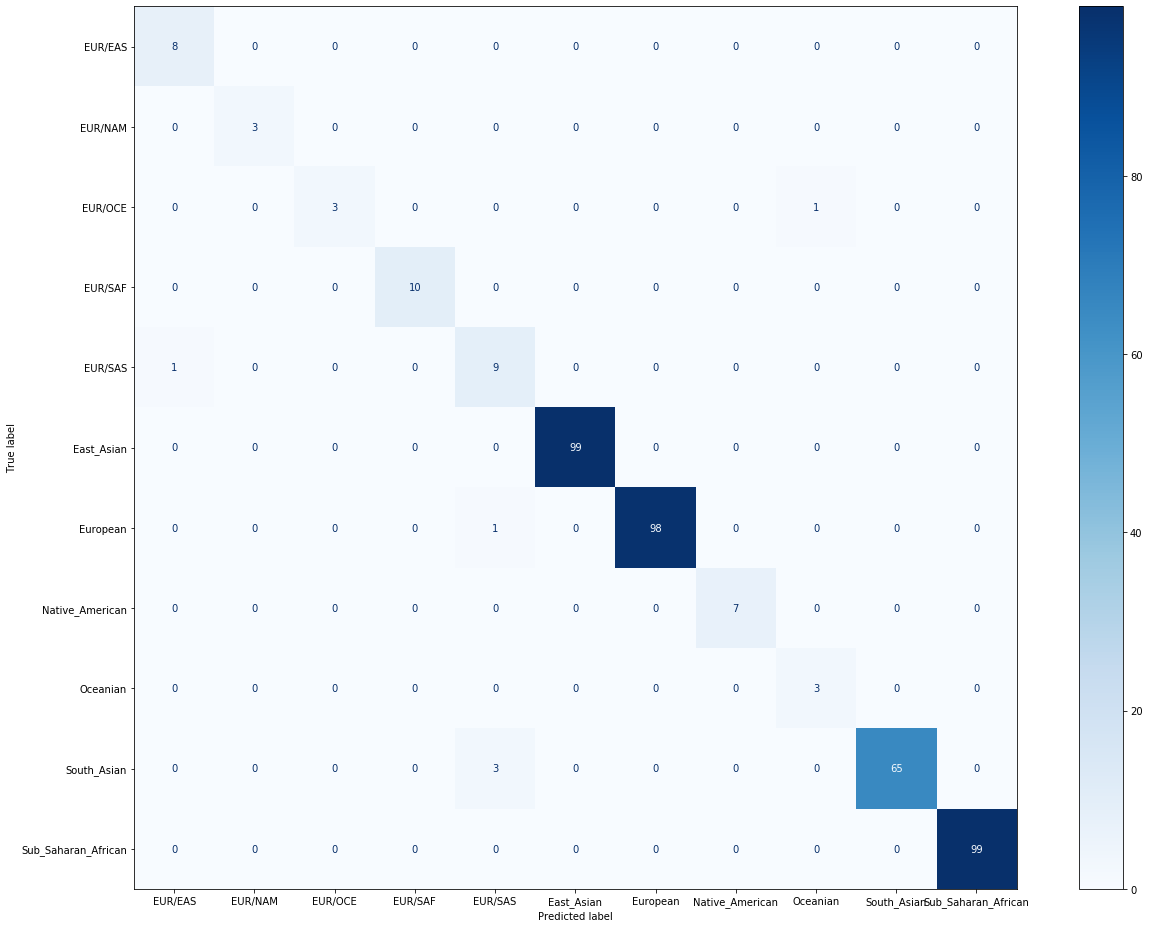

<Figure size 2340x1800 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(18, 13))
plot_confusion_matrix(clf_final, xtest[3], ytest[3], cmap=plt.cm.Blues, ax=ax, values_format='d')

plt.tight_layout()
plt.savefig('conf_LDA.jpg')

figure(figsize=(13, 10), dpi=180)

In [143]:
GSCV.predict_proba(new_sample)

array([[4.21522524e-08, 6.93673438e-08, 9.99999757e-01, 1.73415620e-17,
        1.31748449e-07, 3.91857120e-38, 3.65016505e-18, 5.43142651e-27,
        2.26884832e-22, 3.75383983e-12, 3.66985879e-73]])